### Kaggle Project - Titanic 

In [16]:
# Download data
!kaggle competitions download -c titanic -p "Data/Raw"

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
# Install required packages
%pip install missingno
%pip install seaborn
%pip install iplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 9.7 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/3.6.1/libexec/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Unzip downloaded files
import zipfile as zf

titanic = zf.ZipFile("Data/Raw/Titanic.zip")

titanic.extractall("Data/Raw")

titanic.close()

# View files extracted
from os import listdir

listdir("Data/Raw")

In [79]:
# Read in train.csv and print the first five rows
import pandas as pd

train = pd.read_csv("Data/Raw/train.csv")

# Show the first 10 rows
train.iloc[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [145]:
# Set passenger ID as index of the dataframe
train = train.set_index("PassengerId")

# Show data types of each column
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [151]:
# Change data types to categorical where applicable
for column in ["Survived", "Pclass", "Sex", "Embarked", "SibSp", "Parch"]:
    train[column] = train[column].astype("category")


Next, let's view the distribution of each variable.

In [152]:
# Define a function to create a summary of value counts for each categorical variable
def summarytable(df):
    
    # Define output table ST
    ST = pd.DataFrame(columns = ["Variable", "Value", "Count"])
    
    # Exclude float type columns
    df = df.select_dtypes(include = ["category"])
    
    # Exclude columns with too many unique values
    
    # Loop through all columns
    for column in df:
       
        # Count values in each column
        k = train[column].value_counts(dropna = False)
  
        # Turn counts into a data frame
        k1 = pd.DataFrame(data = k)
        
        # Make index (which is the Value column) a column
        k1.reset_index(inplace = True)
        
        # Give the right column names
        k1 = k1.set_axis(["Value", "Count"], axis = "columns")
        
        # Add Variable column
        k1["Variable"] = column

        # Append to ST
        ST = pd.concat([ST,k1])
    
    return ST

ST = summarytable(train)

ST

,Variable,Value,Count
0,Survived,0,549
1,Survived,1,342
0,Pclass,3,491
1,Pclass,1,216
2,Pclass,2,184
0,Sex,male,577
1,Sex,female,314
0,SibSp,0,608
1,SibSp,1,209
2,SibSp,2,28


Now we can plot the categorical variables' distribution.

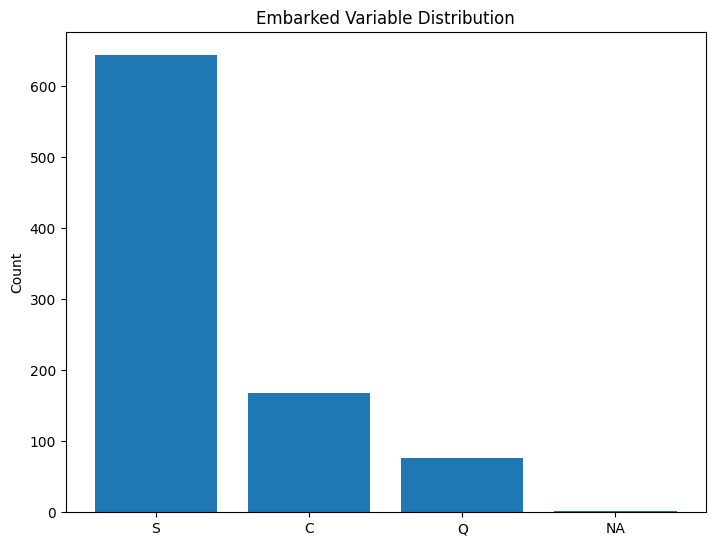

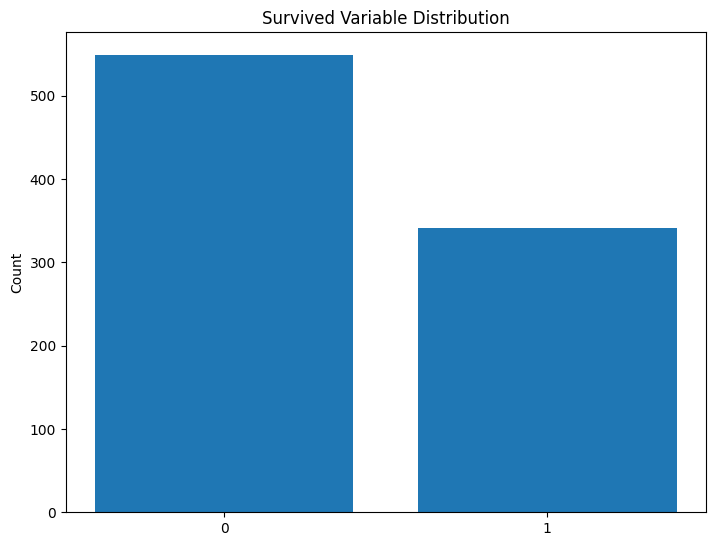

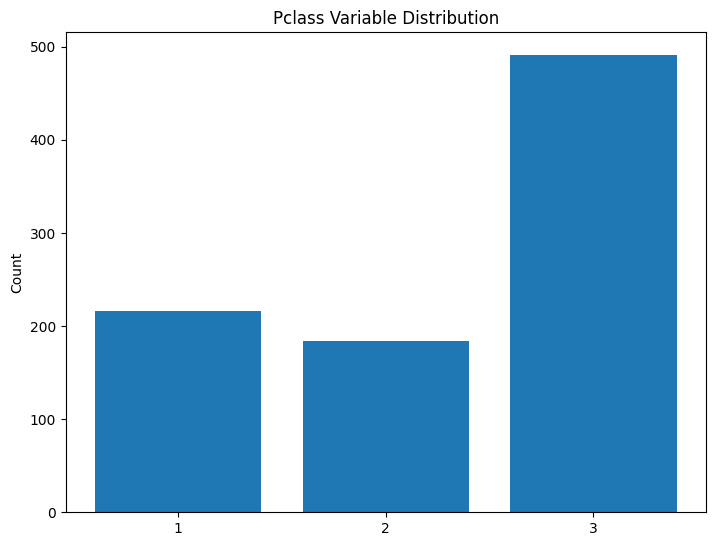

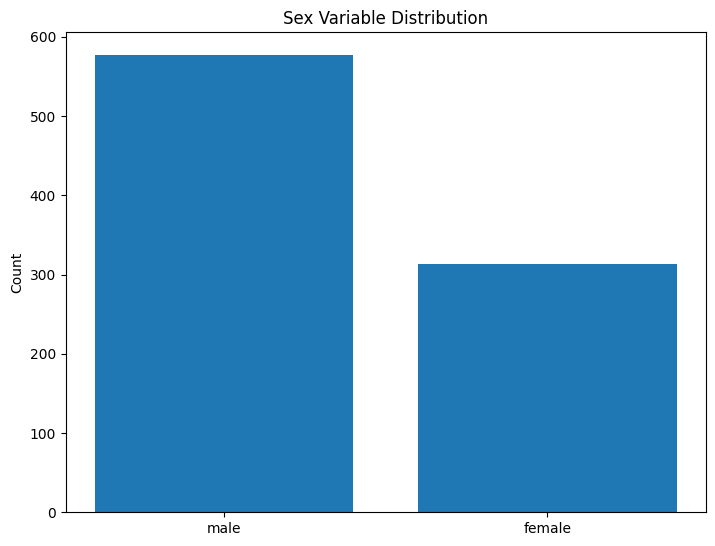

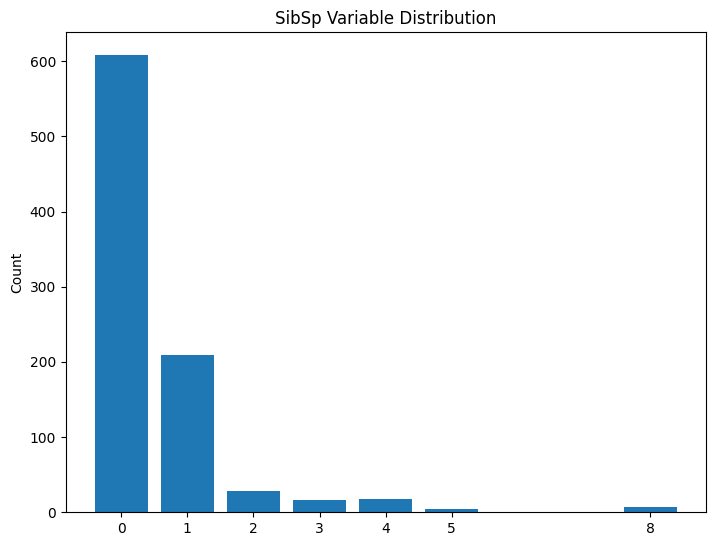

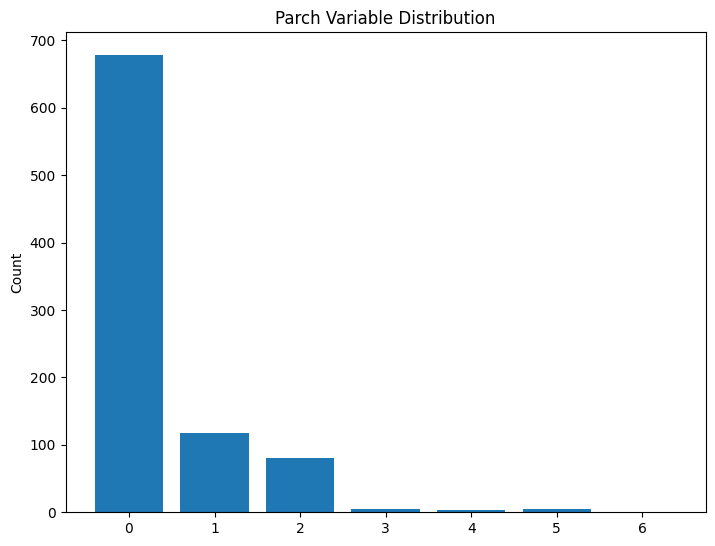

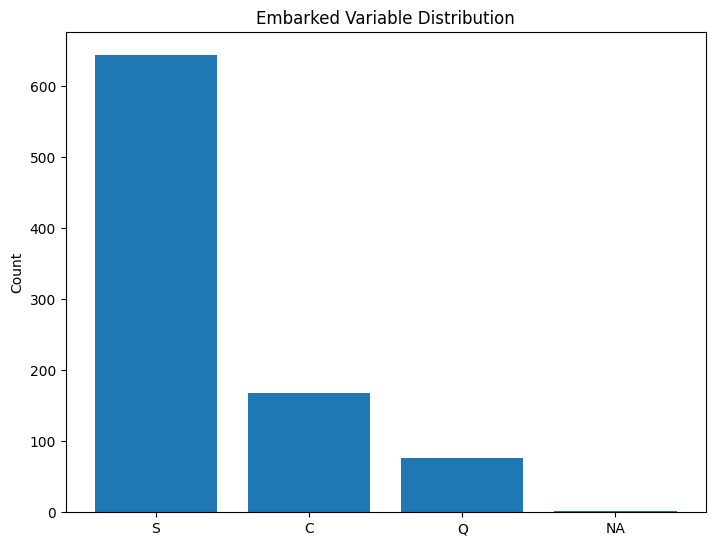

In [153]:
ST = summarytable(train)

ST = ST.fillna("NA")

# Plot Distribution graphs

def itt_barplot(df):
    
    # Get a list of unique variables
    var = ST["Variable"].unique()
    
    for x in var:
        
        df1 = df[df["Variable"] == x]
        
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(df1["Value"], df1["Count"])
        ax.set_ylabel("Count")
        ax.set_title(x + " Variable Distribution")
        ax.set_xticks(df1["Value"].values.tolist())
    
    return fig

itt_barplot(ST)


Some categorical data are extremely unbalanced, including Embarked, Parch, and SibSp, but there is no obvious reason to believe any of them do not represent the population data, so we can proceed.

Next, let's investigate floating data.

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

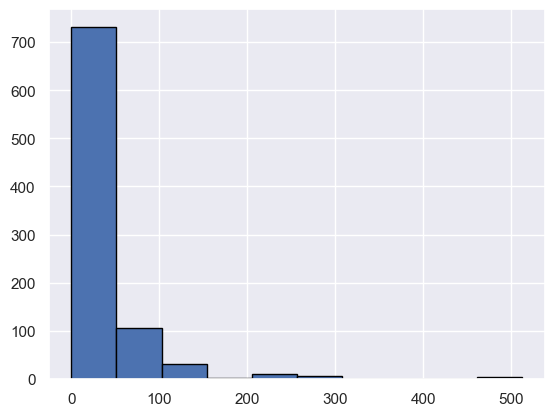

In [249]:
counts, bins = np.histogram(train["Fare"])
plt.hist(bins[:-1], bins, weights = counts, edgecolor = "black")

This needs more investigation. Let's try plotting Fare against PClass to see if they make sense or maybe it's nonsence.

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64

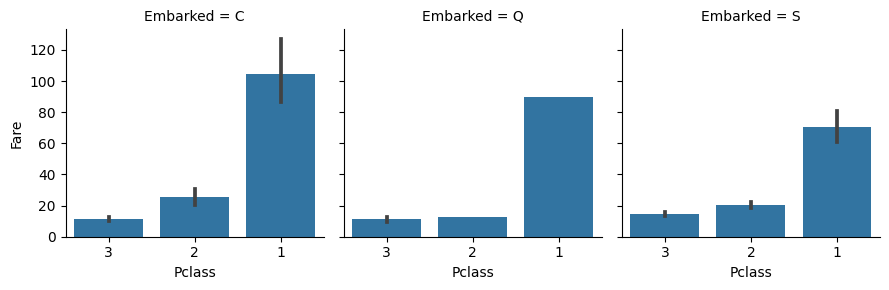

In [189]:
train[(train["Fare"] > 200)]

train[(train["Pclass"] == 1)]

import seaborn as sns

g = sns.FacetGrid(train, col = "Embarked")
g.map(sns.barplot, "Pclass", "Fare", order = [3, 2, 1])

class1 = train.loc[train["Pclass"] == 2]["Fare"]

class1.describe()

It seems like first class tickets have a much bigger variance compared to the other two. From https://www.cruisemummy.co.uk/titanic-ticket-prices/, the average prices of a first class, second class, and third class ticket are 30, 12, and 7 respectively. The fare data doesn't seem very accurate (especially with all the 0s). It might be better to use Pclass instead.

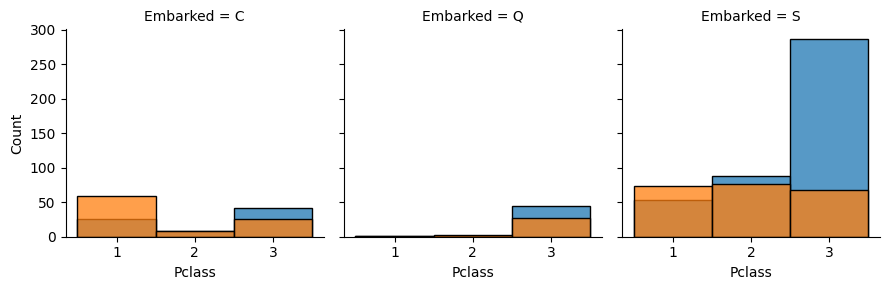

In [207]:
g = sns.FacetGrid(train, col = "Embarked", hue = "Survived")
g.map(sns.histplot, "Pclass")


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isnaAge
PassengerId,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1


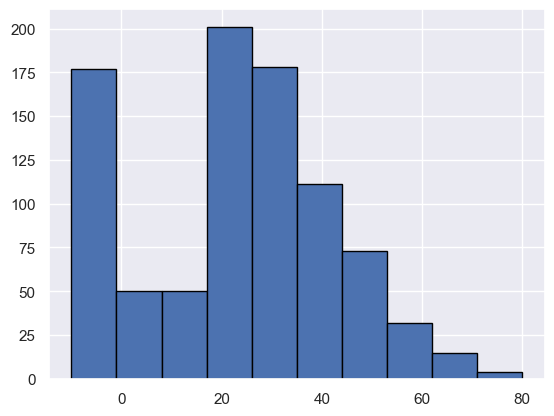

In [250]:
# Change NAs to -10 for the plot
Age = train["Age"].fillna(-10)

counts, bins = np.histogram(Age)
plt.hist(bins[:-1], bins, weights = counts, edgecolor = "black")

train[train["Age"].isna()]

In [225]:
# For Cabin and Name, I just want to count the duplicates out of curiosity.

name_count = train.pivot_table(index = ['Name'], aggfunc ='size')

name_count[name_count > 1]


['B18',
 'B20',
 'B22',
 'B28',
 'B35',
 'B49',
 'B5',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B77',
 'B96 B98',
 'C123',
 'C124',
 'C125',
 'C126',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C52',
 'C65',
 'C68',
 'C78',
 'C83',
 'C92',
 'C93',
 'D',
 'D17',
 'D20',
 'D26',
 'D33',
 'D35',
 'D36',
 'E101',
 'E121',
 'E24',
 'E25',
 'E33',
 'E44',
 'E67',
 'E8',
 'F G73',
 'F2',
 'F33',
 'F4',
 'G6']

All the names are unique, which is good! Some Cabins have 2-4 duplicates, which also sounds reasonable.

In [236]:

cabin_count = train.pivot_table(index = ['Cabin'], aggfunc ='size')

cabin_count[cabin_count > 1]

Cabin
B18                2
B20                2
B22                2
B28                2
B35                2
B49                2
B5                 2
B51 B53 B55        2
B57 B59 B63 B66    2
B58 B60            2
B77                2
B96 B98            4
C123               2
C124               2
C125               2
C126               2
C2                 2
C22 C26            3
C23 C25 C27        4
C52                2
C65                2
C68                2
C78                2
C83                2
C92                2
C93                2
D                  3
D17                2
D20                2
D26                2
D33                2
D35                2
D36                2
E101               3
E121               2
E24                2
E25                2
E33                2
E44                2
E67                2
E8                 2
F G73              2
F2                 3
F33                3
F4                 2
G6                 4
dtype: int64

Now let's look at missing values.

<Axes: >

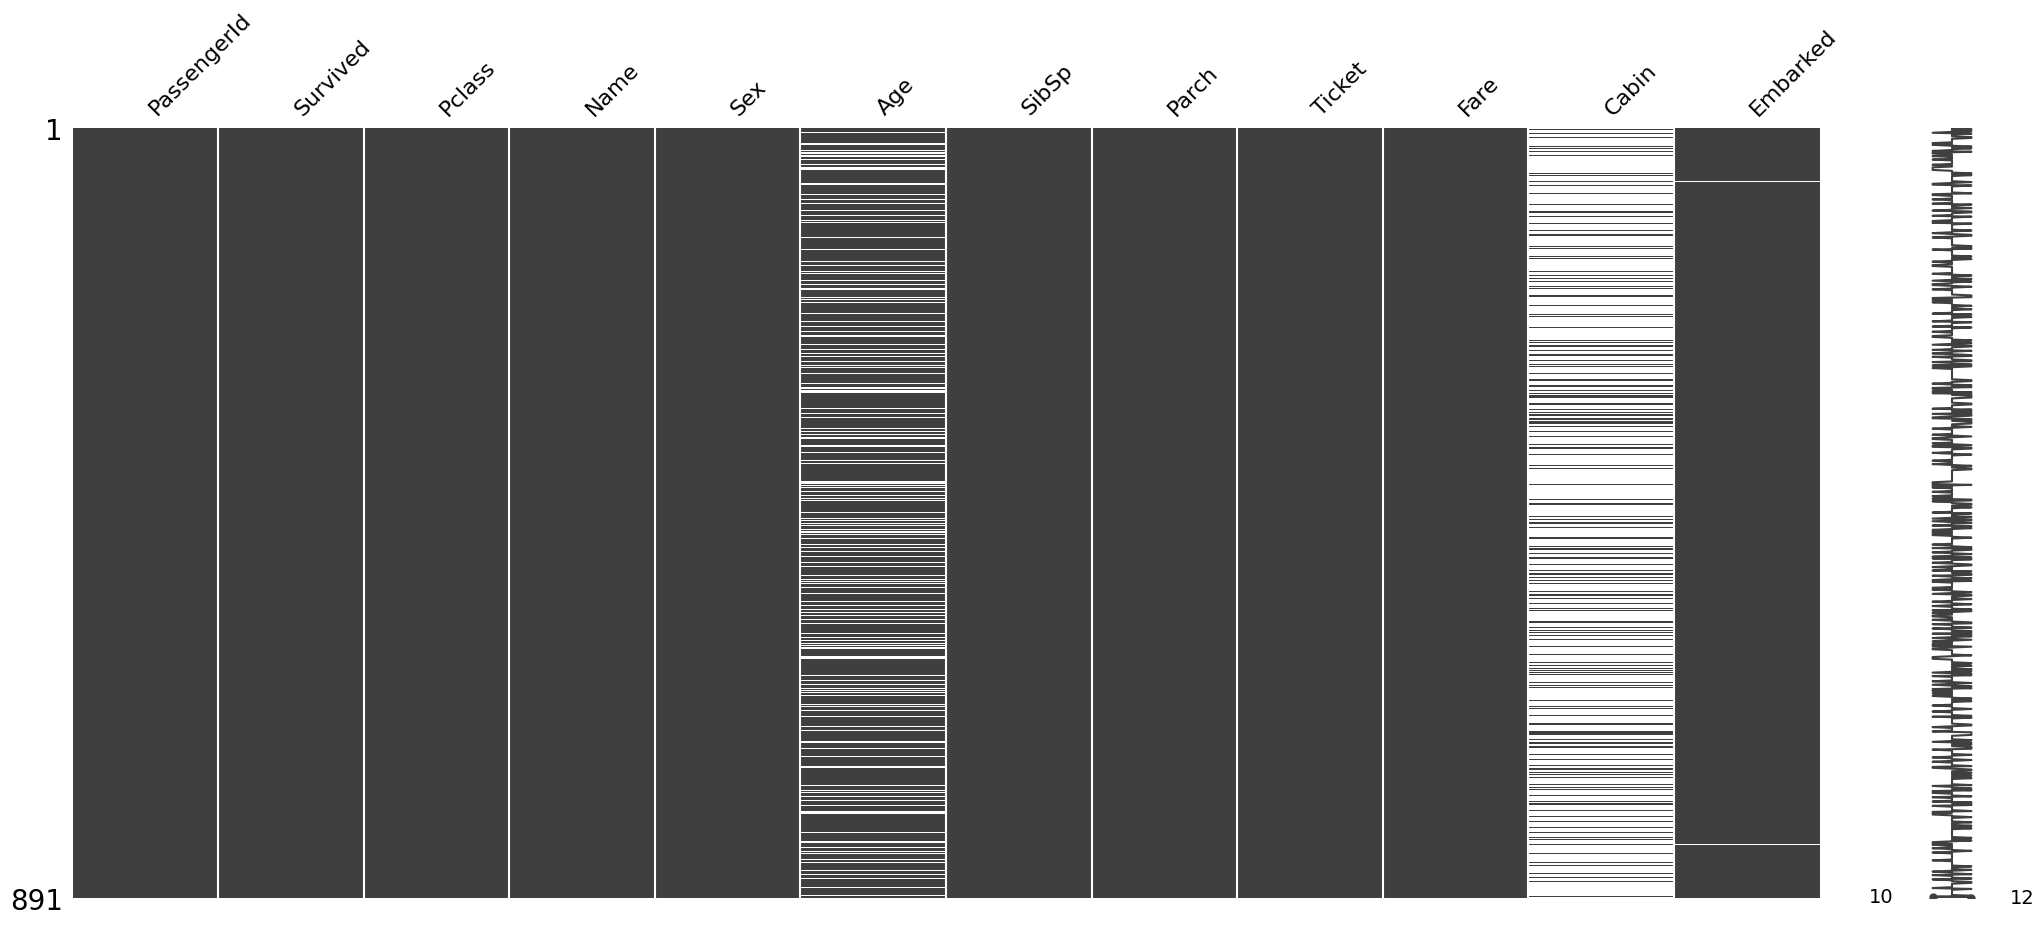

In [32]:
# Plot missing value matrix
import missingno as msno

msno.matrix(train)

We see that most NAs occured for variable Cabin, followed by Age and only a couple of values missing for embarked. I want to see if there is any patterns on the missing data (e.g. people not survived? People in lower cabin class?).

In [288]:
train["isnaAge"] = np.where(train["Age"].isna(), 1, 0)

#sns.set()
ag = train.groupby(['Survived', "isnaAge"]).count().unstack()
ag = ag["Name"]

ag

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(ag["Survived"], ag["isnaAge"])
#ax.set_ylabel('Counts')
#ax.set_title('Counts by survival and isNAage')
#ax.set_xticks(ag["Survived"].values.tolist)
#ax.set_yticks(np.arange(0, 81, 10))
#ax.legend(labels=['Men', 'Women'])
#plt.show()

#ag.plot(kind = 'bar', width = 1)


#plt.show()



isnaAge,0,1
Survived,,
0,424,125
1,290,52


People who haven't survived are more likely to have no Age reported.

<Axes: >

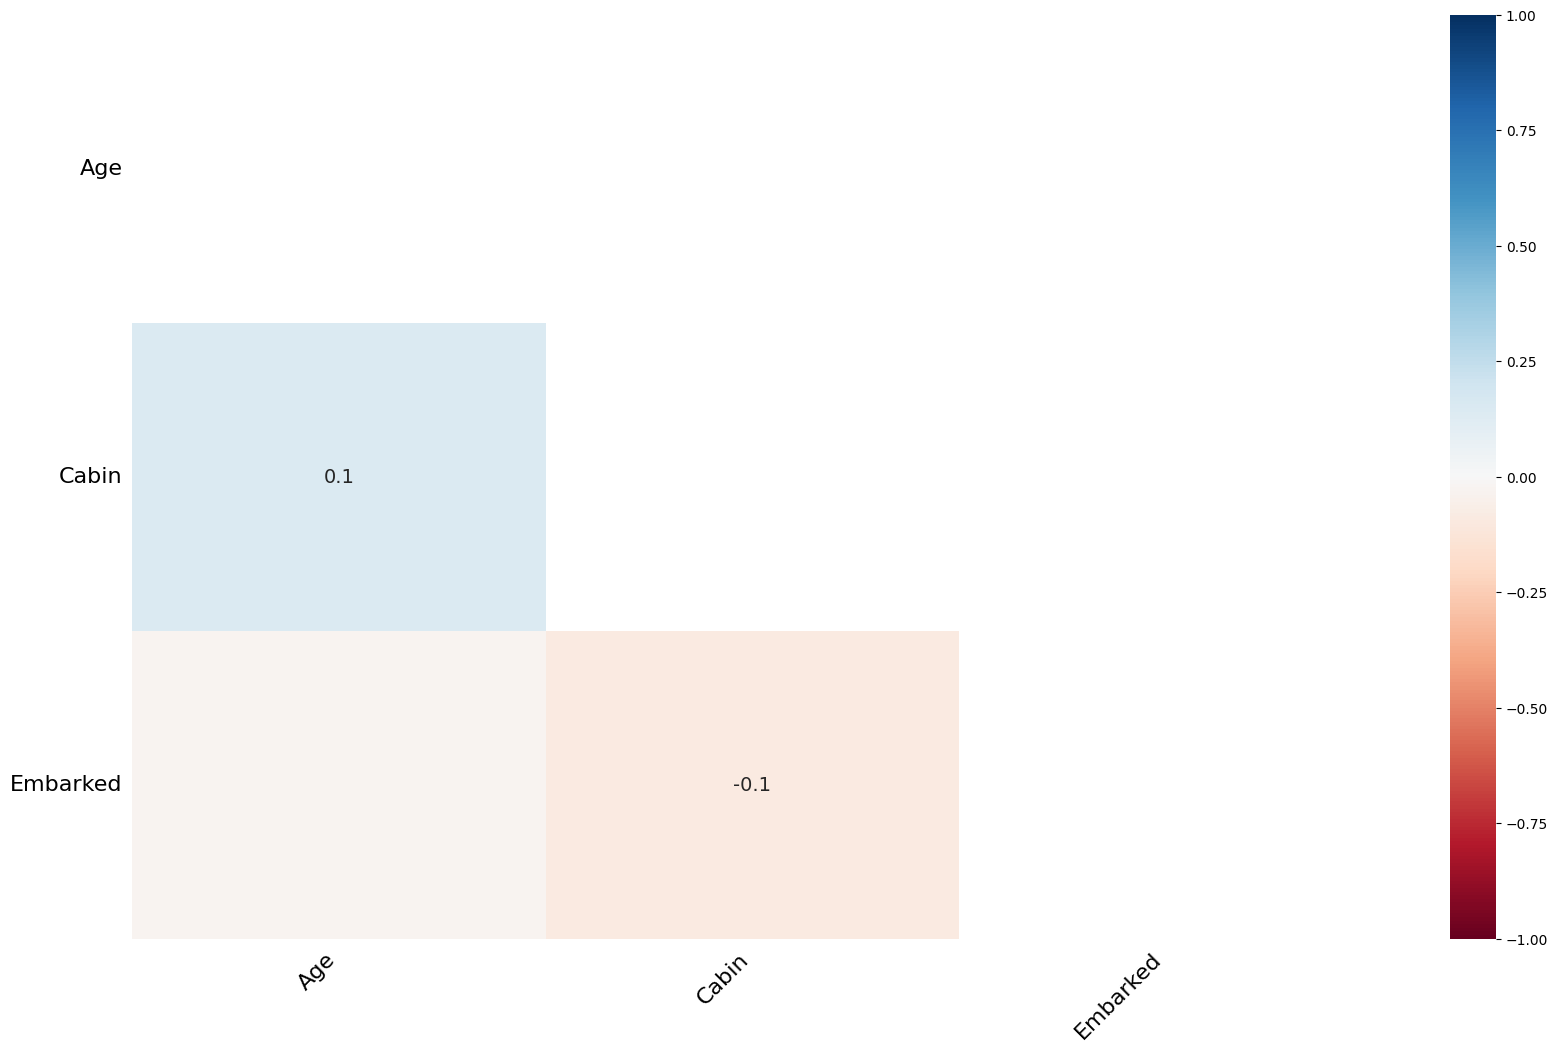

In [33]:
msno.heatmap(train)

Correlation between the missing values are low. Even though there is a small relationship between Age and Cabin, and Cabin and Embarked. Suggesting that people at certain ages and embarked from certain ports are more likely to have Cabin number missing. 

In [3]:
# Plot data correlations
#import numpy as np

corr = train.corr(numeric_only = True)
corr.style.background_gradient(cmap = "coolwarm")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Survived has the highest correlation with Pclass (as expected). So lower class (which has a higher number) means lower survival chance.
- Fare has the highest correlation with Pclass, again as expected.
- Number of parents/children aboard correlates with number of siblings/spouses aboard, suggesting that people tend to travel with more than one family members, especially for those that tend to be younger (negative corr. with age).
- Young people tend to stay in lower class.
- Interestingly, even though Parch and SibSp are positively correlated to Fare, they are also positively correlated with Pclass (which might be due to the age factor?). Maybe they tend to be in lower class, but usually in the better cabins within that class.

In [13]:
# Install packages


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 8.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.5 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/3.6.1/libexec/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use

<zipfile.ZipFile filename='Data/Raw/Titanic.zip' mode='r'>